# Python with Fantasy Football

Part 1 (https://www.fantasyfootballdatapros.com/blog/intermediate/1)

## Setting up the Dataframe

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Import File
df = pd.read_csv(r'/Users/henryrodwell/Desktop/Data Science Projects/2019.csv') 
df.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
0,1,Christian McCaffrey*\McCaCh01,CAR,RB,23,16,16,0,2,0,...,19,1.0,NaN,355.0,471.2,477.2,413.2,215.0,1,1.0
1,2,Lamar Jackson*\JackLa00,BAL,QB,22,15,15,265,401,3127,...,7,NaN,1.0,418.0,417.7,431.7,423.7,152.0,1,2.0
2,3,Derrick Henry*\HenrDe00,TEN,RB,25,15,15,0,0,0,...,18,NaN,NaN,277.0,294.6,303.6,285.6,136.0,2,3.0
3,4,Aaron Jones\JoneAa00,GNB,RB,25,16,16,0,0,0,...,19,NaN,NaN,266.0,314.8,322.8,290.3,125.0,3,4.0
4,5,Ezekiel Elliott*\ElliEz00,DAL,RB,24,16,16,0,0,0,...,14,NaN,NaN,258.0,311.7,319.7,284.7,117.0,4,5.0


In [3]:
#View Headings
df.columns

Index(['Rk', 'Player', 'Tm', 'FantPos', 'Age', 'G', 'GS', 'Cmp', 'Att', 'Yds',
       'TD', 'Int', 'Att.1', 'Yds.1', 'Y/A', 'TD.1', 'Tgt', 'Rec', 'Yds.2',
       'Y/R', 'TD.2', 'Fmb', 'FL', 'TD.3', '2PM', '2PP', 'FantPt', 'PPR',
       'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'],
      dtype='object')

In [4]:
#Drop Unnecessary Columns
df.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb', 'GS'], axis=1, inplace=True)
df.head()

,Player,Tm,FantPos,Age,G,Cmp,Att,Yds,TD,Int,...,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,FL,TD.3
0,Christian McCaffrey*\McCaCh01,CAR,RB,23,16,0,2,0,0,0,...,1387,4.83,15,142,116,1005,8.66,4,0,19
1,Lamar Jackson*\JackLa00,BAL,QB,22,15,265,401,3127,36,6,...,1206,6.85,7,0,0,0,NaN,0,2,7
2,Derrick Henry*\HenrDe00,TEN,RB,25,15,0,0,0,0,0,...,1540,5.08,16,24,18,206,11.44,2,3,18
3,Aaron Jones\JoneAa00,GNB,RB,25,16,0,0,0,0,0,...,1084,4.59,16,68,49,474,9.67,3,2,19
4,Ezekiel Elliott*\ElliEz00,DAL,RB,24,16,0,0,0,0,0,...,1357,4.51,12,71,54,420,7.78,2,2,14


To drop columns from a pandas DataFrame, you simple use the .drop built-in method for the DataFrame, pass in a list of column names, set axis = 1, and set inplace = True. Setting axis = 1 tells pandas that we are committing a change on the column axis. In pandas, 0 is the row axis and 1 is the column axis. Setting inplace=True tells pandas to make a permanent change to our DataFrame.

In [5]:
#Clean Player Column
df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])
df.head()

,Player,Tm,FantPos,Age,G,Cmp,Att,Yds,TD,Int,...,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,FL,TD.3
0,Christian McCaffrey,CAR,RB,23,16,0,2,0,0,0,...,1387,4.83,15,142,116,1005,8.66,4,0,19
1,Lamar Jackson,BAL,QB,22,15,265,401,3127,36,6,...,1206,6.85,7,0,0,0,NaN,0,2,7
2,Derrick Henry,TEN,RB,25,15,0,0,0,0,0,...,1540,5.08,16,24,18,206,11.44,2,3,18
3,Aaron Jones,GNB,RB,25,16,0,0,0,0,0,...,1084,4.59,16,68,49,474,9.67,3,2,19
4,Ezekiel Elliott,DAL,RB,24,16,0,0,0,0,0,...,1357,4.51,12,71,54,420,7.78,2,2,14


In [6]:
#Rename Columns
df.rename({
'FantPos' : 'Pos',   
'TD': 'PassingTD',
'TD.1': 'RushingTD',
'TD.2': 'ReceivingTD',
'TD.3': 'TotalTD',
'Yds': 'PassingYDs',
'Yds.1': 'RushingYDs',
'Yds.2': 'ReceivingYDs',
'Att': 'PassingAtt',
'Att.1': 'RushingAtt'
}, axis=1, inplace=True)
df.head()

,Player,Tm,Pos,Age,G,Cmp,PassingAtt,PassingYDs,PassingTD,Int,...,RushingYDs,Y/A,RushingTD,Tgt,Rec,ReceivingYDs,Y/R,ReceivingTD,FL,TotalTD
0,Christian McCaffrey,CAR,RB,23,16,0,2,0,0,0,...,1387,4.83,15,142,116,1005,8.66,4,0,19
1,Lamar Jackson,BAL,QB,22,15,265,401,3127,36,6,...,1206,6.85,7,0,0,0,NaN,0,2,7
2,Derrick Henry,TEN,RB,25,15,0,0,0,0,0,...,1540,5.08,16,24,18,206,11.44,2,3,18
3,Aaron Jones,GNB,RB,25,16,0,0,0,0,0,...,1084,4.59,16,68,49,474,9.67,3,2,19
4,Ezekiel Elliott,DAL,RB,24,16,0,0,0,0,0,...,1357,4.51,12,71,54,420,7.78,2,2,14


Again, we use axis=1 to indicate that we are making a change on the column axis, and we set inplace=True to tell pandas that we want to make a permanent change to our DataFrame.

In [7]:
#Separate Dataframes by Position
rb_df = df[df['Pos'] == 'RB']
qb_df = df[df['Pos'] == 'QB']
wr_df = df[df['Pos'] == 'WR']
te_df = df[df['Pos'] == 'TE']

In [8]:
#Concentrate Lists
Rushing_Columns = ['RushingAtt', 'RushingYDs', 'Y/A', 'RushingTD']
Receiving_Columns = ['Tgt', 'Rec', 'ReceivingYDs', 'Y/R', 'ReceivingTD']
Passing_Columns = ['PassingAtt', 'PassingYDs', 'PassingTD', 'Int']

def transform_columns(df, new_column_list):
    df = df[['Player', 'Tm', 'Age', 'G'] + new_column_list + ['FL']]
    return df

What we are doing here is essentially assigning columns to the different DataFrames. Although trick plays happen where running backs and wide receivers sometimes throw the ball, this is not something we can ever predict, so we can exclude those columns from our wr_df and rb_df for the sake of simplicity. The syntax for filtering DataFrames and creating new ones based on desired column names is df = df[[‘ColumnName1’, ‘ColumnName2’,]]

I wrote a little function to make the code more legible and simplistic. But essentially we are concatenating lists and following the syntax shown above. All players should have a fumble column, but it’s kind of miscellaneous stat that’s hard to predict so we leave it at the end. Our function returns a new DataFrame, and we assign it to a new variable. 

In [9]:
rb_df = transform_columns(rb_df, Rushing_Columns+Receiving_Columns)
wr_df = transform_columns(wr_df, Rushing_Columns+Receiving_Columns)
te_df = transform_columns(te_df, Receiving_Columns)
qb_df = transform_columns(qb_df, Passing_Columns+Rushing_Columns)

rb_df.head()

,Player,Tm,Age,G,RushingAtt,RushingYDs,Y/A,RushingTD,Tgt,Rec,ReceivingYDs,Y/R,ReceivingTD,FL
0,Christian McCaffrey,CAR,23,16,287,1387,4.83,15,142,116,1005,8.66,4,0
2,Derrick Henry,TEN,25,15,303,1540,5.08,16,24,18,206,11.44,2,3
3,Aaron Jones,GNB,25,16,236,1084,4.59,16,68,49,474,9.67,3,2
4,Ezekiel Elliott,DAL,24,16,301,1357,4.51,12,71,54,420,7.78,2,2
5,Dalvin Cook,MIN,24,14,250,1135,4.54,13,63,53,519,9.79,0,2


In [10]:
#Plot Dataframe for RBs

#Create Column for Fantasy Points (Full PPR)
rb_df['FantasyPoints'] = rb_df['RushingYDs']*0.1 + rb_df['RushingTD']*6 + rb_df['Rec'] + rb_df['ReceivingYDs']*0.1 + rb_df ['ReceivingTD']*6 - rb_df['FL']*2

Here, we want to create a column that calculates total fantasy points. We used 0.1 points per rushing yard + 6 points per rushing TD + 1 point per reception + 0.1 points per receiving yard + 6 points per receiving TD – 2 points per fumble lost.

In [11]:
#Create Column for Fantasy Points (Per Game)
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints']/rb_df['G']
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))

We essentially did the same thing here. We created a new column based off a previous column, and then used the .apply() built-in method and a lambda function to round each answer to two decimal places.

In [12]:
#Create Column for Usage Per Game (Usage is defined as # of targets + carries)
rb_df['Usage/GM'] = (rb_df['RushingAtt'] + rb_df['Tgt'])/rb_df['G']

#Round each row value to two decimal places
rb_df['Usage/GM'] = rb_df['Usage/GM'].apply(lambda x: round(x, 2))

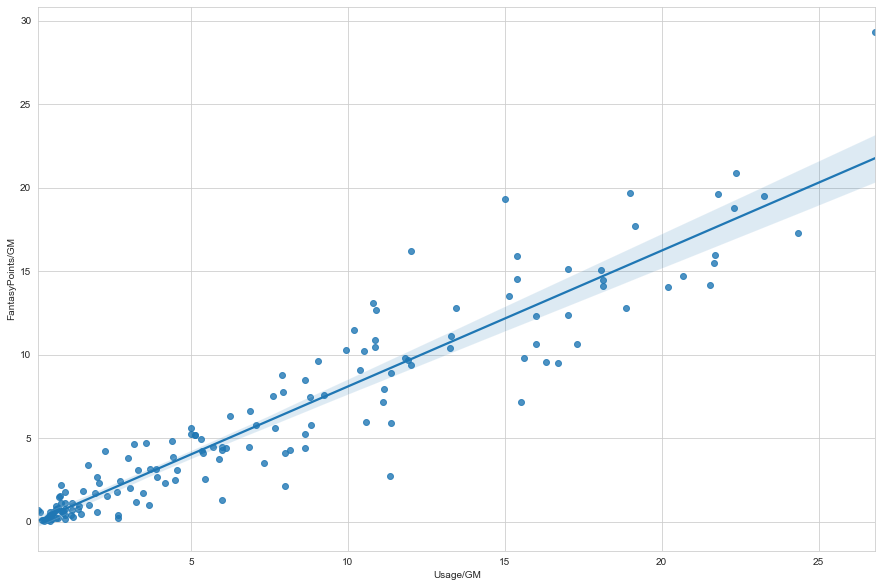

In [13]:
#Styling (Imported seaborn earlier as sns)
sns.set_style('whitegrid')

#Create Canvas with Matplotlib
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

#Basic Regression Scatter Plot with Trendline
plot = sns.regplot(
x=rb_df['Usage/GM'],
y=rb_df['FantasyPoints/GM'],
scatter=True,)

What we are doing with plt.subplots() is essentially creating a canvas to plot our graphs. We then use fig.set_figure_inches(15, 10) to set the height and width of our “canvas”. And finally, we plot using seaborn and the regplot function, using the “Usage/GM” column as our x-axis and [“FantasyPoints/GM”] as our y-axis. Finally we set scatter = True to tell seaborn we want a scatter plot.

## Efficiency vs. Fantasy Points per Game

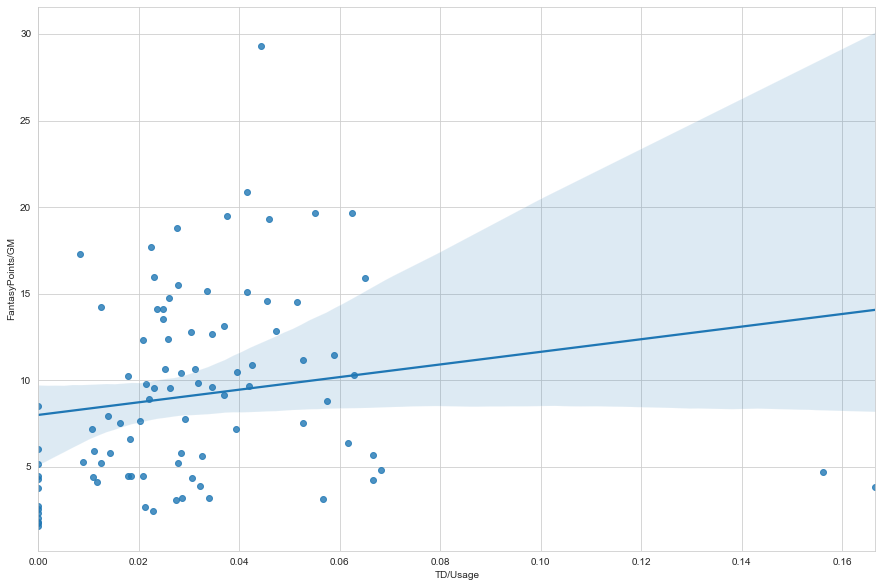

In [14]:
#How RB Efficiency Relates to Fanatasy Performance
rb_df['TD/Usage'] = (rb_df['RushingTD']+rb_df['ReceivingTD'])/(rb_df['RushingAtt']+rb_df['Tgt'])

#Ensure Sample Size Suitable
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

rb_df = rb_df[rb_df['RushingAtt'] > 20]
plot = sns.regplot(
x=rb_df['TD/Usage'],
y=rb_df['FantasyPoints/GM'],
scatter=True)

We are creating a new column again based off other columns, so the syntax is very similar to our previous graph. We define efficiency as TD’s per usage. I admit there are probably better measures of efficiency, but for simplicity’s sake, let’s just roll with this one. 

The setup for matplotlib is the same, we use plt.subplots() to create our “canvas”, and seaborn is essentially the same but we are using a different x and y axis. The one main difference here is that we are filtering for minimum rushing attempts. The setup for matplotlib is the same, we use plt.subplots() to create our “canvas”, and seaborn is essentially the same but we are using a different x and y axis. The one main difference here is that we are filtering for minimum rushing attempts.

## Takeaway

The main takeaway from this should be to draft, pick up, start your running back workhorses. When you see players on the waivers seeing an increasing trend of targets and carries, pick them up. Don’t start running backs until they have proven that they are going to be heavily utilized in the offense.